In [1]:
import Person
import json
import pandas as pd

In [9]:
print("Testing Person class")
probability_dict = {0:0.9,1:0.1}
# Importing population_characteristics
input_file = open("../data/person_probabilities.json", "r")
population_characteristics = json.load(input_file)
input_file.close()

population = {
              "id":[],
              "x":[],
              "y":[],
              "infected":[],
}
# Creating 10 people
for i in range(10000):
    P = Person.Person(**population_characteristics)
    population["id"].append(P.id)
    population["x"].append(P.x)
    population["y"].append(P.y)
    population["infected"].append(Person.return_random_choice(probability_dict))
population = pd.DataFrame(population)

Testing Person class


In [10]:
from sklearn.metrics import pairwise_distances

In [11]:
def find_infected_count(population, distance=2):
    pwd = pd.DataFrame(pairwise_distances(population[["x", "y"]]))
    potential_infections = {"id":[],
                            "count":[]}
    for person, distance in zip(population, pwd):
        n_infected = len(population[(population["infected"] == 1)&
                        ((population["x"] <= person[1] +distance)&
                        (population["x"] >= person[1] - distance))&
                        ((population["y"] <= person[2] +distance)&
                        (population["y"] >= person[2] - distance))
                        ])
        if n_infected > 0:
            potential_infections["id"].append(person[0])
            potential_infections["count"].append(n_infected)
    return potential_infections

In [12]:
def find_infected_count_01(population, distance=2):
    pwd = pd.DataFrame(pairwise_distances(population[["x", "y"]]))
    potential_infections = {"id":[],
                            "count":[]}
    for person, person_distance in zip(population.values, pwd.values):
        n_infected = sum(population[(person_distance <= distance)]["infected"] == 1)
        if n_infected - person[3] > 0:
            potential_infections["id"].append(person[0])
            potential_infections["count"].append(n_infected)
    return potential_infections

In [9]:
import json
input_file = open("../data/person_probabilities.json", "r")
population_characteristics = json.load(input_file)
input_file.close()

In [20]:
population_characteristics.keys()

dict_keys(['sex_probability', 'age_probability', 'fertility_rate', 'mortality_rate'])

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (24, 16)
def plot_subjects(df,colName, title, xlabel, ylabel):   
    fontdict = {"fontsize":20}
    plt.barh(df.index, df[colName].values,)
    plt.title(title,fontdict)
    plt.ylabel(ylabel,fontdict)
    plt.xlabel(xlabel,fontdict)
    plt.show()

In [38]:
population_characteristics.keys()

dict_keys(['sex_probability', 'age_probability', 'fertility_rate', 'mortality_rate'])

In [44]:
len(data.split("\n\n"))

1856

In [94]:
import json
def extract_location_data(path):
    """
    This function is used to extract the location data from the text and store it in an easier to use json format.
    """
    # Read data in from txt file
    output_file= open(file=path, mode="r", encoding="utf-8") 
    data = output_file.read()
    output_file.close()

    reformated_data = {}
    # The three groups used and time points are split by \n\n
    people_type = ["healthy", "infected", "recovered"]
    split_data = data.split("\n\n")
    for time in range(len(split_data)):
        current_data = split_data[time].split("\n")
        reformated_data[time] = {}
        for i in range(3):
            reformated_data[time][people_type[i]] = {"x":[],
                                            "y":[]}
            try:                              
                for point in current_data[i][2:-2].split("], ["):
                    if len(point.split(", ")) > 1:
                        try:
                            reformated_data[time][people_type[i]]["x"].append(float(point.split(", ")[0]))
                            reformated_data[time][people_type[i]]["y"].append(float(point.split(", ")[1]))
                        except ValueError:
                            pass
            except IndexError:
                print(f"Missing data on day {time}, current value {current_data}")
                print(f"May be due to error at the end of the data.")
        updated_path = path[:-3]+"json"
    save_dictionary(updated_path, reformated_data)

def save_dictionary(updated_path, data):
    # Save dictionary to a json file
    output_file = open(updated_path, 'w', encoding='utf-8')
    json.dump(data, output_file, indent=4)
    output_file.close()

In [97]:
output_file= open(file="..\data\Pop300_ICR0.01_Fert0.2_Mort4.0_CCP0.75_Dist4\location_data.txt", mode="r", encoding="utf-8") 
data = output_file.read()
output_file.close()
test_dict = {}
people_type = ["healthy", "infected", "recovered"]
split_data = data.split("\n\n")[:800]
for time in range(len(split_data)):
    current_data = split_data[time].split("\n")
    test_dict[time] = {}
    for i in range(3):
        test_dict[time][people_type[i]] = {"x":[],
                                           "y":[]}
        try:                              
            for point in current_data[i][2:-2].split("], ["):
                if len(point.split(", ")) > 1:
                    try:
                        test_dict[time][people_type[i]]["x"].append(float(point.split(", ")[0]))
                        test_dict[time][people_type[i]]["y"].append(float(point.split(", ")[1]))
                    except ValueError:
                        pass
        except IndexError:
            print(f"Missing data on day {time}, current value {current_data}")
            print(f"May be due to error at the end of the data.")

In [99]:
test_dict[100]

{'healthy': {'x': [117.49586740235591,
   79.64177670318867,
   184.91587084655998,
   88.47647990398639,
   125.21615091517855,
   63.652712615713114,
   46.28959436438016,
   20.29195587612391,
   139.55093253208213,
   194.2993796270174,
   59.39202455810397,
   88.22981720224574,
   128.50458501566737,
   150.3859077283948,
   117.22021188765947,
   0.0,
   198.46674739471496,
   144.8588220182559,
   94.31556031265796,
   153.92229804075166,
   55.06955200680988,
   8.561657257915748,
   87.79664207019364,
   17.366535925648087,
   178.50607560602776,
   18.866015808790387,
   165.61582867679988,
   143.00231799005303,
   145.0597097694804,
   0.0,
   125.5897181278674,
   128.8477893649957,
   147.63694479515397,
   190.03312913328188,
   7.727754568778762,
   27.804762650869595,
   188.4190324367741,
   83.68565251113213],
  'y': [172.33536044302366,
   162.35386305863744,
   163.5400965119251,
   182.01449325369185,
   45.85749007217428,
   171.52399828725166,
   50.28400451078

In [87]:
"ab.txt"[:-3]

'ab.'

In [91]:
path = ".json"
output_file = open(path, 'a', encoding='utf-8')

output_file.close()

In [96]:
extract_location_data("..\data\Pop300_ICR0.01_Fert0.2_Mort4.0_CCP0.75_Dist4\location_data.txt")

In [70]:
test_dict[1]["healthy"]["y"]

[70.52024631963374,
 86.58682171757073,
 100.85954806731516,
 109.47132184733242,
 26.206926916017288,
 15.916486021053043,
 115.53119082317514,
 48.7762728924008,
 165.7960820565302,
 0.0,
 71.34617948179269,
 200.0,
 27.611954108762745,
 41.027324215026724,
 77.38489657887753,
 176.663618462484,
 13.446087478553967,
 143.7666358785466,
 197.05826508444676,
 87.38608205266397,
 164.71372425516358,
 104.42499523910956,
 174.68035082991258,
 116.46682317313156,
 185.55599393736657,
 74.8062455560878,
 167.25153355978387,
 90.81752103218182,
 103.30925386866124,
 132.02927907087982,
 6.000768439650264,
 181.51570892291875,
 130.167552728698,
 130.39737414938008,
 193.96230899258182,
 67.34787321174387,
 163.59735889308723,
 81.37087975480839,
 154.86690588756284,
 158.6808845471579,
 98.3262267045051,
 194.84608891859273,
 80.47939398323206,
 118.86141740458751,
 113.65326407513457,
 178.6340972697094,
 144.27744026706011,
 117.6491384891844,
 78.74442530983148,
 81.19065759884201,
 0.0,

In [54]:
import matplotlib.pyplot as plt

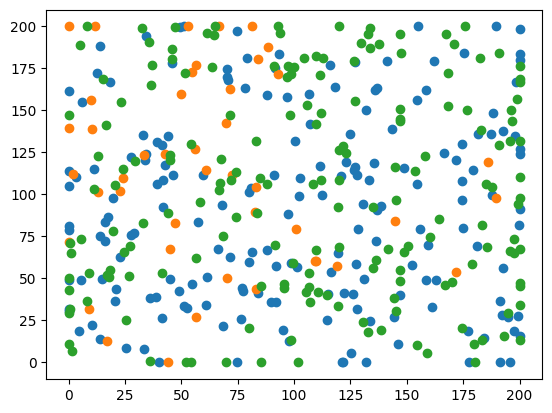

In [59]:
time = 400
plt.scatter(test_dict[time]["healthy"]["x"], test_dict[time]["healthy"]["y"])
plt.scatter(test_dict[time]["infected"]["x"], test_dict[time]["infected"]["y"])
plt.scatter(test_dict[time]["recovered"]["x"], test_dict[time]["recovered"]["y"])

In [5]:
for i, j in zip([0,1,2], ["female","male",_]):
    print(i,j)

0 female
1 male
2 


In [127]:
data.split("\n\n")[1].split("\n")

['[[159.12802763048305, 5.658851352385308], [145.902614480324, 200.0], [126.72560005749921, 191.1441691695015], [39.64458037771675, 115.10488422514133], [143.46776200951032, 199.0085402774146], [81.57804540436483, 44.2080096889282], [168.0207412588924, 176.10372624892088], [48.45337580535201, 168.42886843058], [14.427090309996897, 121.54520540160107], [151.00573590598898, 12.522600479593772], [150.3539656884879, 190.05217426869714], [29.107690313525104, 188.4073195216141], [78.63379359932975, 45.52650196332048], [69.47389510788182, 47.47673277391517]]',
 '[]',
 '[]']

In [108]:
len([[float(point.split(", ")[0]),float(point.split(", ")[0])]for point in data[2:-2].split("], [")])

42678

In [49]:
df_age.index = df_age.index.astype("int")

In [73]:
type("True")

str

In [86]:
if True:
    directory_path = f"..\data\Pop"
    
    directory_path = directory_path.replace("\\","/")
    # If folder doesn't exist, then create it.
    if not os.path.isdir(directory_path):
        os.makedirs(directory_path)
    print("Data saved to the directory : ", directory_path)

Data saved to the directory :  ../data/Pop


In [59]:
df_age = pd.DataFrame(index=population_characteristics["age_probability"].keys(), data=population_characteristics["age_probability"].values()).rename(columns={0:"Sex"})
df_age.index = df_age.index.astype("int")
df_age.head(10)

,Sex
0,0.0139
1,0.0139
2,0.0139
3,0.0139
4,0.0139
10,0.0134
11,0.0134
12,0.0134
13,0.0134
14,0.0134


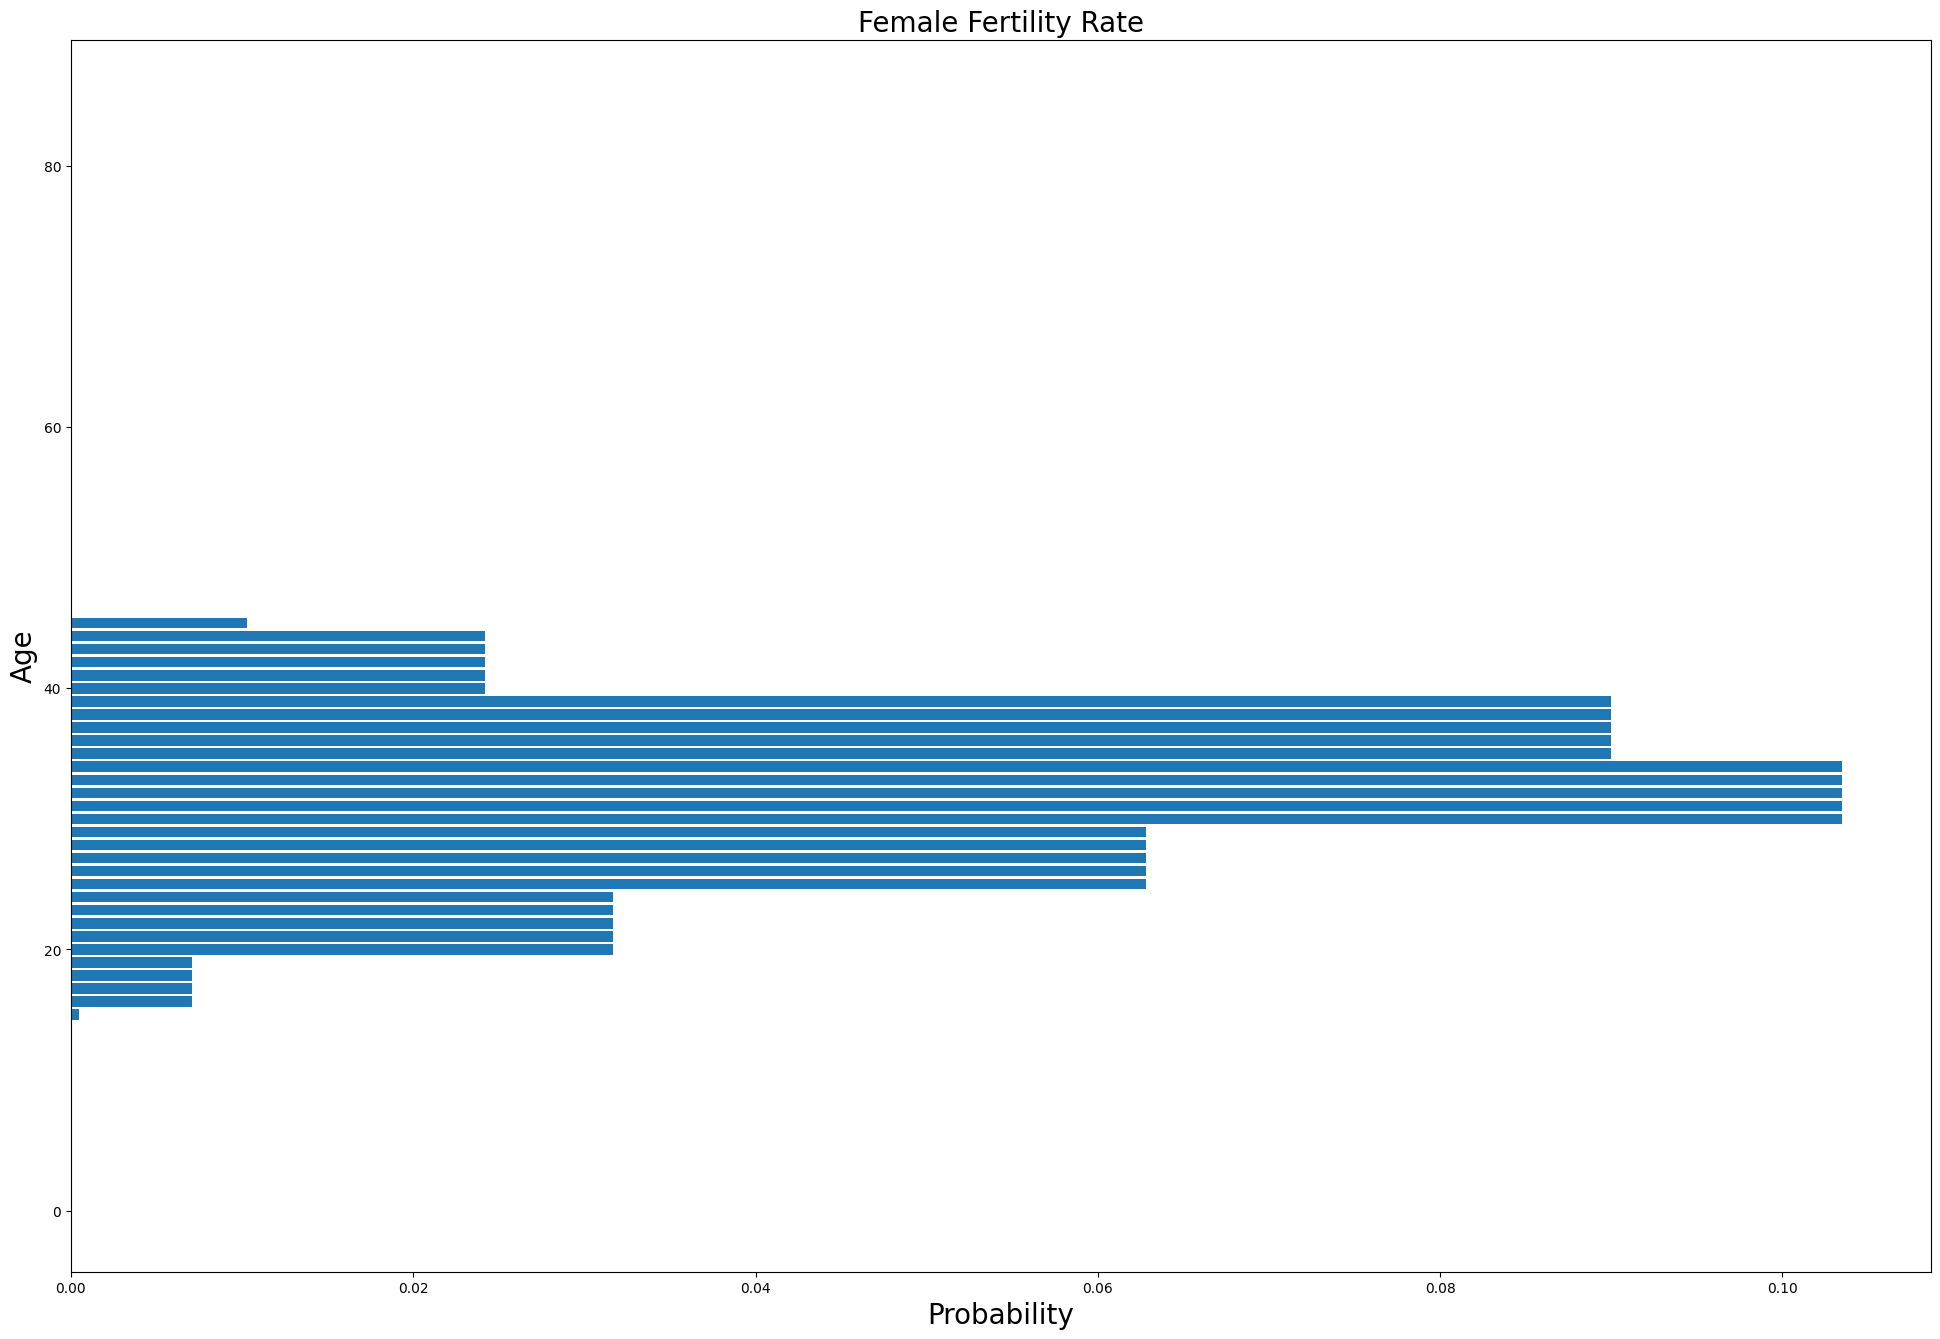

In [57]:
df_age = pd.DataFrame(index=population_characteristics["fertility_rate"].keys(), data=population_characteristics["fertility_rate"].values()).rename(columns={0:"Sex"})
df_age.index = df_age.index.astype("int")
plot_subjects(df_age.sort_index(),"Sex", "Female Fertility Rate", "Probability", "Age")

<Axes: >

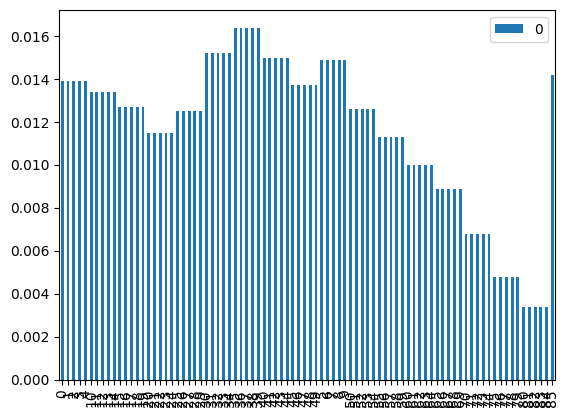

In [ ]:
Vaccinated_12_plus_years_old
Booster_vaccine_0_to_11_years_old

In [36]:
import pandas as pd
vaccine_data = pd.read_csv("../data/vaccination_stats.csv", index_col=[0], parse_dates=[0]).rename(columns={"V1_11-":"Vaccinated_11-",
                                                                                "V1_12+":"Vaccinated_12+",
                                                                                "V2_11-":"Booster_vaccine_11-",
                                                                                "V2_12+":"Booster_vaccine_12+"})
vaccine_data.head()

,Vaccinated_11-,Vaccinated_12+,Booster_vaccine_11-,Booster_vaccine_12+
2020-01-01,0.0,0.0,0.0,0.0
2020-02-01,0.0,0.0,0.0,0.0
2020-03-01,0.0,0.0,0.0,0.0
2020-04-01,0.0,0.0,0.0,0.0
2020-05-01,0.0,0.0,0.0,0.0


<Axes: >

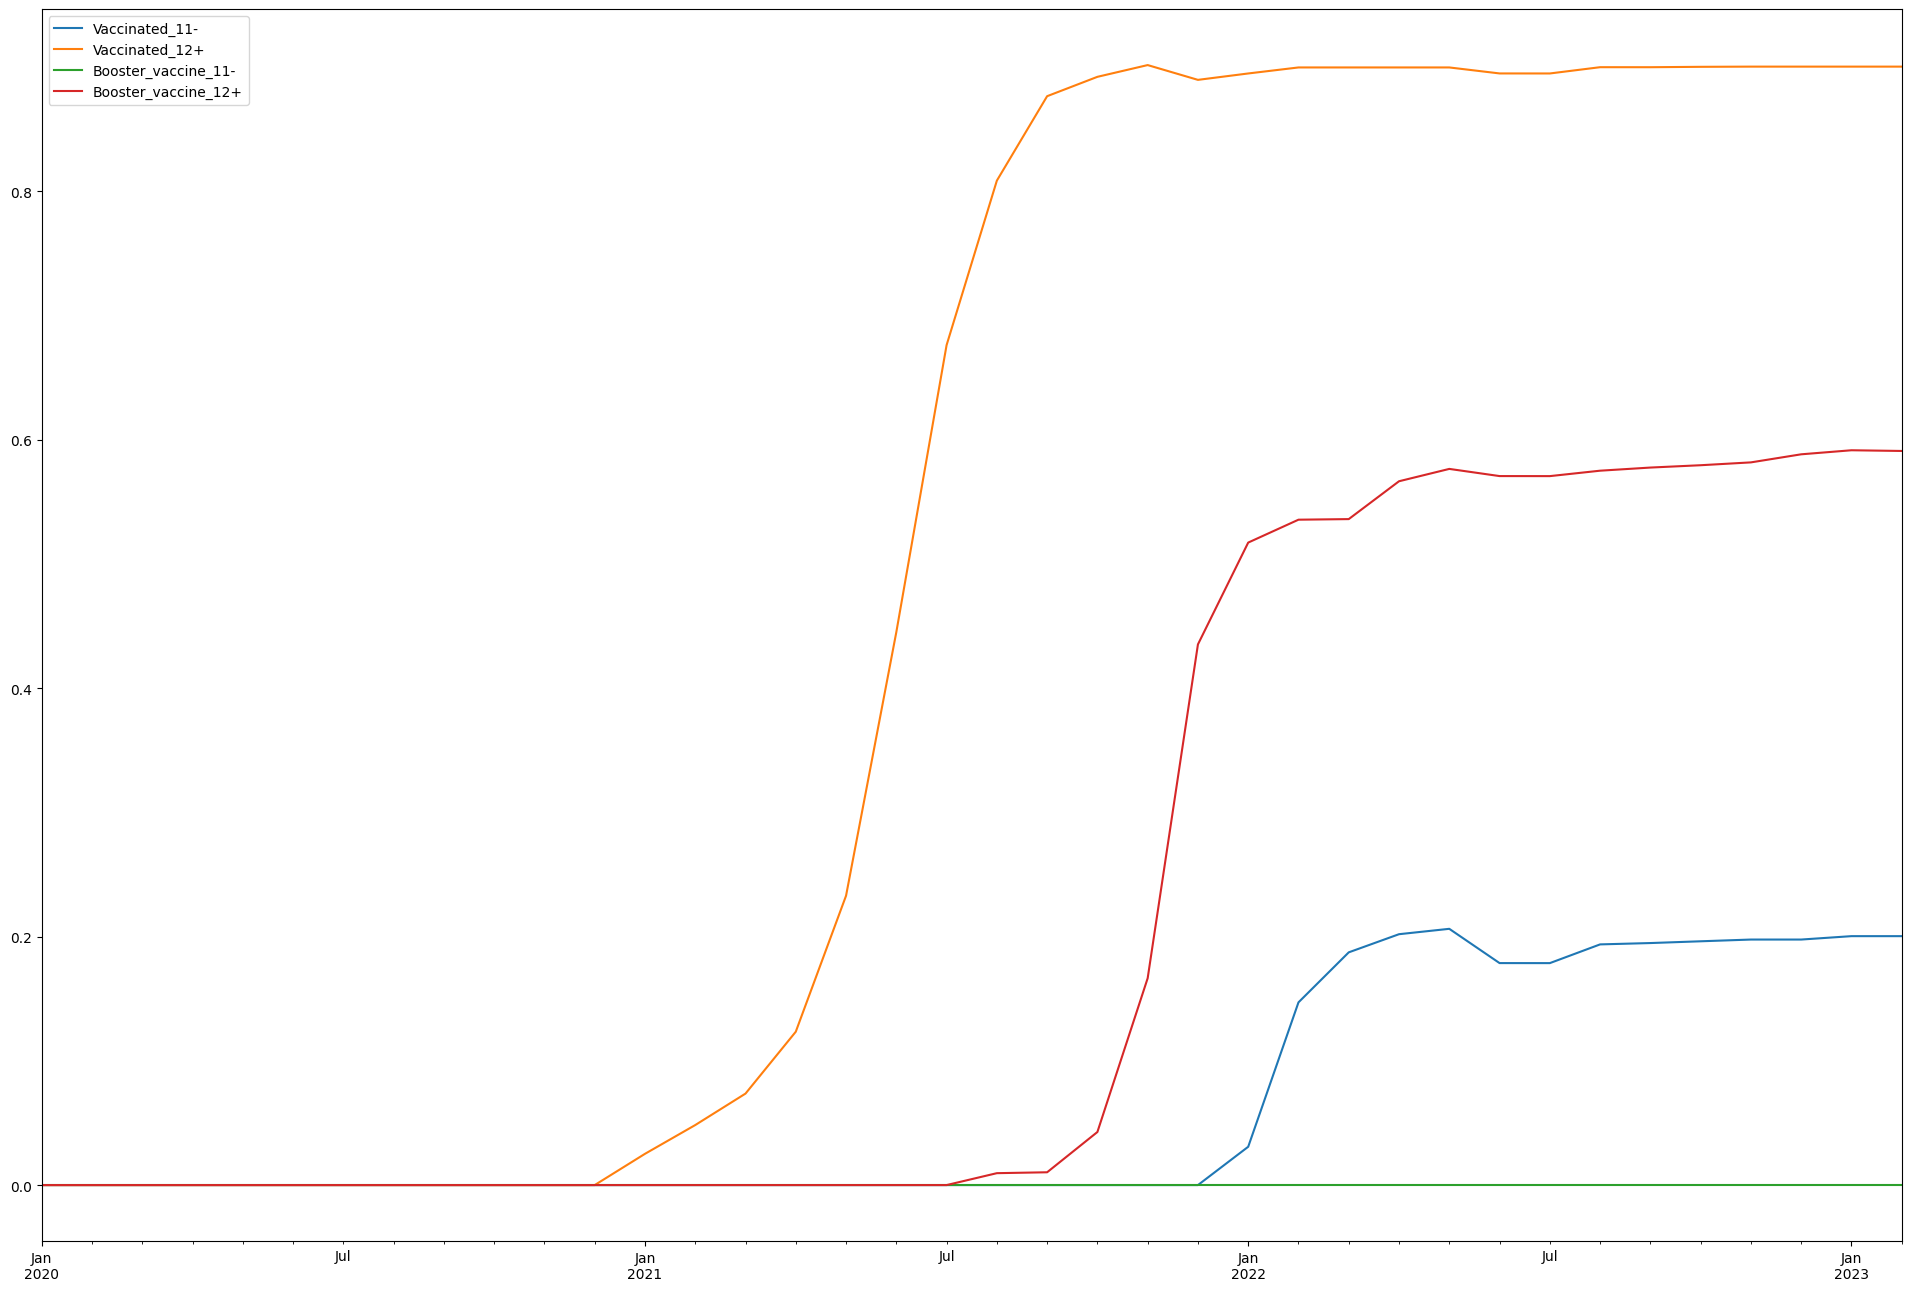

In [37]:
vaccine_data.plot()

In [16]:
date_1 = 
end_date = 
end_date

Timestamp('2020-01-01 00:00:00')

In [36]:
datetime.datetime.strptime("2020/01/01", "%Y/%m/%d")

datetime.datetime(2020, 1, 1, 0, 0)

In [38]:
start_date = pd.to_datetime("2020-01-01")
current_date = start_date + datetime.timedelta(days=400)

In [2]:
test_key = {1:1}
test_key.get(2, 0)

0

In [3]:
test_key[2]

KeyError: 2

In [42]:
data[data.index < current_date]["V1_12+"][-1]

0.0483192771084337

In [13]:
data = pd.read_csv("../data/vaccination_stats.csv", index_col=0, parse_dates=[0])

In [22]:
def get_vaccinated(time, start_date):
    global 
    date_1 = start_date + datetime.timedelta(days=0)
    end_date = pd.to_datetime("2020-01-01") + datetime.timedelta(days=0)
    day >= pd.to_datetime("2021-01-01")

,V1_11-,V1_12+,V2_11-,V2_12+
2020-01-01,0.000000,0.000000,0.0,0.000000
2020-02-01,0.000000,0.000000,0.0,0.000000
2020-03-01,0.000000,0.000000,0.0,0.000000
2020-04-01,0.000000,0.000000,0.0,0.000000
2020-05-01,0.000000,0.000000,0.0,0.000000
2020-06-01,0.000000,0.000000,0.0,0.000000
2020-07-01,0.000000,0.000000,0.0,0.000000
2020-08-01,0.000000,0.000000,0.0,0.000000
2020-09-01,0.000000,0.000000,0.0,0.000000
2020-10-01,0.000000,0.000000,0.0,0.000000


In [21]:
data[data.index < end_date]

,V1_11-,V1_12+,V2_11-,V2_12+


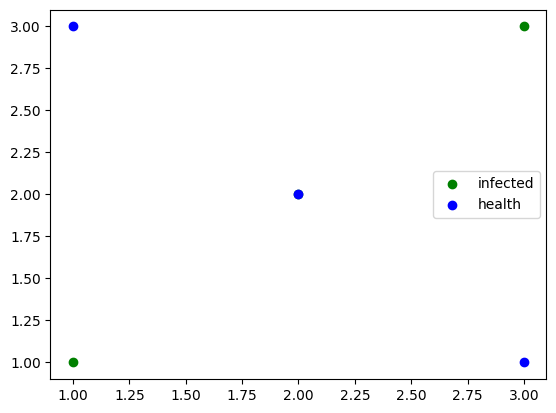

In [19]:
from pylab import *
infected_x = [1,2,3]
infected_y = [1,2,3]
scatter(infected_x, infected_y, color = 'green')
scatter(infected_x, infected_y[::-1], color = 'blue')
legend({"infected":"green", "health":"blue"})

In [13]:
xx = {1:1,2:2}
xy = {}
print(xx)

xy[1] = xx[1]
xx.pop(1)

print(xx)
print(xy)

{1: 1, 2: 2}
{2: 2}
{1: 1}


In [19]:
print(xy)
xy[2] = xy.get(2,-1) + 1
print(xy)
xy[1] = xy.get(1,-1) + 1
print(xy)

{1: 1}
{1: 1, 2: 0}
{1: 2, 2: 0}


In [13]:
find_infected_count_01(population, distance=2)

{'id': [100011.0,
  100068.0,
  100086.0,
  100180.0,
  100208.0,
  100241.0,
  100248.0,
  100363.0,
  100416.0,
  100485.0,
  100655.0,
  100692.0,
  100794.0,
  100884.0,
  100954.0,
  101073.0,
  101321.0,
  101336.0,
  101345.0,
  101523.0,
  101537.0,
  101562.0,
  101564.0,
  101633.0,
  101708.0,
  102407.0,
  102582.0,
  102619.0,
  102640.0,
  102811.0,
  102835.0,
  102951.0,
  103045.0,
  103411.0,
  103480.0,
  103489.0,
  103502.0,
  103552.0,
  103578.0,
  103589.0,
  103649.0,
  103652.0,
  103757.0,
  103872.0,
  103886.0,
  103977.0,
  104078.0,
  104137.0,
  104162.0,
  104260.0,
  104322.0,
  104701.0,
  104743.0,
  104760.0,
  104826.0,
  104836.0,
  105019.0,
  105295.0,
  105525.0,
  105591.0,
  105613.0,
  105750.0,
  105810.0,
  105815.0,
  106093.0,
  106463.0,
  106487.0,
  106639.0,
  106712.0,
  106718.0,
  106833.0,
  106985.0,
  107006.0,
  107021.0,
  107117.0,
  107319.0,
  107326.0,
  107445.0,
  107453.0,
  107477.0,
  107488.0,
  107712.0,
  107871.0

In [14]:
def find_infected_count_02(population, distance=2):
    potential_infections = {"id":[],
                            "count":[]}
    for person in population[population["infected"] == 0].values:
        n_infected = len(population[(population["infected"] == 1)&
                        ((population["x"] <= person[1] +distance)&
                        (population["x"] >= person[1] - distance))&
                        ((population["y"] <= person[2] +distance)&
                        (population["y"] >= person[2] - distance))
                        ])
        if n_infected > 0:
            potential_infections["id"].append(person[0])
            potential_infections["count"].append(n_infected)
    return potential_infections

In [15]:
find_infected_count_02(population, distance=2)

{'id': [100011.0,
  100086.0,
  100180.0,
  100208.0,
  100241.0,
  100248.0,
  100334.0,
  100363.0,
  100416.0,
  100636.0,
  100692.0,
  100794.0,
  100884.0,
  100954.0,
  101051.0,
  101073.0,
  101074.0,
  101098.0,
  101147.0,
  101321.0,
  101336.0,
  101345.0,
  101403.0,
  101481.0,
  101523.0,
  101537.0,
  101562.0,
  101564.0,
  101633.0,
  101708.0,
  101752.0,
  101765.0,
  101925.0,
  102407.0,
  102582.0,
  102619.0,
  102640.0,
  102753.0,
  102784.0,
  102811.0,
  102835.0,
  102951.0,
  103475.0,
  103480.0,
  103489.0,
  103502.0,
  103552.0,
  103578.0,
  103589.0,
  103649.0,
  103652.0,
  103757.0,
  103858.0,
  103872.0,
  103886.0,
  103977.0,
  104008.0,
  104078.0,
  104137.0,
  104162.0,
  104260.0,
  104322.0,
  104440.0,
  104630.0,
  104701.0,
  104743.0,
  104760.0,
  104826.0,
  104836.0,
  104854.0,
  105019.0,
  105295.0,
  105525.0,
  105591.0,
  105613.0,
  105665.0,
  105750.0,
  105810.0,
  105815.0,
  106034.0,
  106093.0,
  106463.0,
  106487.0